<a href="https://colab.research.google.com/github/Tara-Sophia/MachineLearning_Class/blob/main/2487_Assignment3_2122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The assignment 3 contains 2 questions and the due date is April 24th (Sunday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [3]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

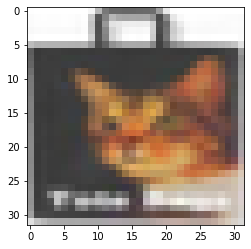

In [4]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

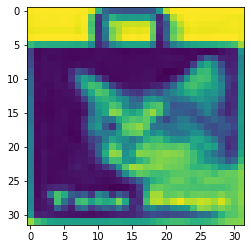

In [5]:
plt.imshow(x_train[3000][:, :, 0])

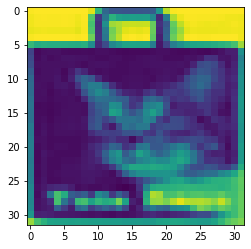

In [6]:
plt.imshow(x_train[3000][:, :, 1])

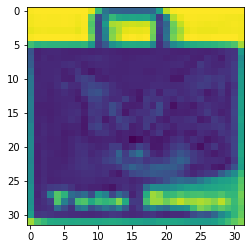

In [7]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

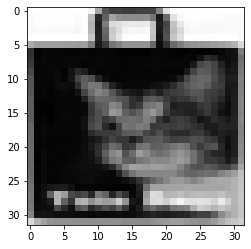

In [8]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (15 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

In [9]:
# convert all color images in x_train to greyscale ---> numpy reshape(to vector)-> sklearn.decomposition.PCA  --> dimensions 256 afterwards
from sklearn.decomposition import PCA
#es wird grau
x_train_grey_scale = 0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2]
nsamples,nx,ny= x_train_grey_scale.shape
print(x_train.shape)
print(x_train_grey_scale.shape)
#reshape von 3d zu 2d
x_train_grey_scale_small = x_train_grey_scale.reshape((nsamples,nx*ny))
print(x_train_grey_scale_small.shape)
pca = PCA(n_components = 256).fit(x_train_grey_scale_small)
x_train_projected = pca.transform(x_train_grey_scale_small)
x_train_projected_reconstructed = pca.inverse_transform(x_train_projected)
x_train_projected_reconstructed.shape
# reconstruct images from its reduced presentation
# choose image and see after/before PCA --> Explain findings

(50000, 32, 32, 3)
(50000, 32, 32)
(50000, 1024)


(50000, 1024)

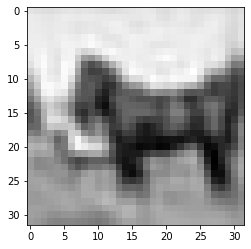

In [10]:
plt.imshow(x_train_projected_reconstructed[12].reshape((32,32)), cmap=plt.cm.gray);

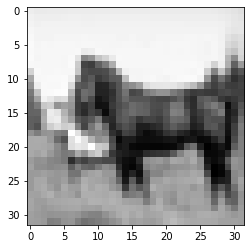

In [11]:
plt.imshow(x_train_grey_scale[12], cmap='gray');

### Question 1.3 (15 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

In [12]:

print(f"Explained Variance : {sum(pca.explained_variance_ratio_)}")
# we keep around 97% of the variance of the data with only 256 components

Explained Variance : 0.9726687741644543


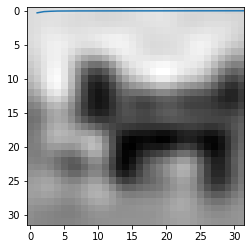

In [13]:
plt.plot(range(1,257), pca.explained_variance_ratio_) # we can see its before 30
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
next_occ = next(x for x, elements in enumerate(cumsum_variance) if elements > 0.9)
next_occ #75
pca_76 = PCA(n_components = next_occ+1).fit(x_train_grey_scale_small)
x_train_projected_76 = pca_76.transform(x_train_grey_scale_small)
x_train_projected_reconstructed_76 = pca_76.inverse_transform(x_train_projected_76)
plt.imshow(x_train_projected_reconstructed_76[12].reshape((32,32)), cmap=plt.cm.gray);


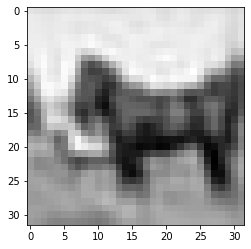

In [14]:

plt.imshow(x_train_projected_reconstructed[12].reshape((32,32)), cmap=plt.cm.gray);

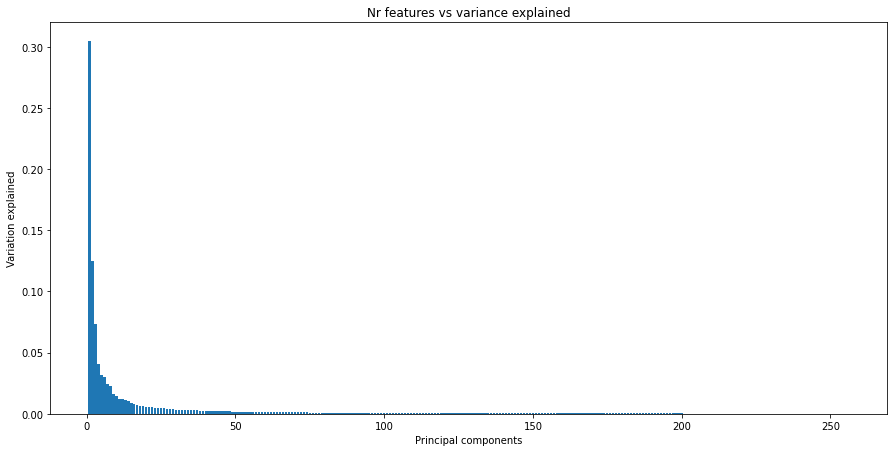

In [15]:
fig = plt.figure(figsize = (15, 7.2)) 
plt.title("Nr features vs variance explained")
plt.ylabel('Variation explained')
plt.xlabel('Principal components')
plt.bar(list(range(1,257)),pca.explained_variance_ratio_)
plt.show()

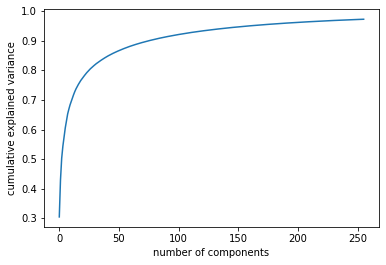

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Question 1.4 (15 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [21]:
dict_categorical = {0:'airplane', 1: 'automobile', 
                    2: 'bird', 3: 'cat', 4:'deer',
                    5: 'dog', 6:'frog', 7:'horse', 
                    8: 'ship', 9:'truck'}

y_train_c = np.vectorize(dict_categorical.get)(y_train)
y_train_cat = y_train_c.reshape(50000)
y_train_cat = pd.Series(y_train_cat).astype('category')

In [22]:
y_train_cat.shape

(50000,)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_validate
model = LogisticRegression()
model.fit(x_train_projected_76,y_train_cat)
scores = cross_validate(model, x_train_projected_76, y_train_cat, cv=5,
                        scoring='f1', return_train_score=True)
scores

{'fit_time': array([6.96667027, 6.82049799, 6.9698329 , 7.16135144, 6.98921776]),
 'score_time': array([0.05889034, 0.05854106, 0.05929565, 0.06089425, 0.05903745]),
 'test_score': array([nan, nan, nan, nan, nan]),
 'train_score': array([nan, nan, nan, nan, nan])}

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [27]:
# Reshape
nsamples,nx,ny, ncolor = x_train.shape
x_train_reshape = x_train.reshape(nsamples,nx*ny*ncolor)
#pca = PCA(n_components = 256).fit(x_train_grey_scale_small)
#x_train_projected = pca.transform(x_train_grey_scale_small)
#x_train_projected_reconstructed = pca.inverse_transform(x_train_projected)
#x_train_projected_reconstructed.shape
#----------------------------------------------
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32)
kmeans.fit(x_train_reshape)
labels = kmeans.labels_
labels # each label is an index of the center it belogns to



array([ 7, 11,  0, ...,  0,  8,  3], dtype=int32)

In [28]:
centers = kmeans.cluster_centers_
print(centers.shape)
centers[0] # Each centers is a mean colors in (RGB) terms
# numpy vectorized way
X_compressed = centers[labels]
X_compressed
X_compressed = X_compressed.astype('uint8')

(32, 3072)


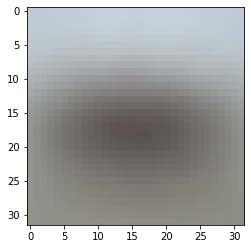

In [32]:
X_compressed.shape
plt.imshow(X_compressed[12].reshape((32,32,3)));

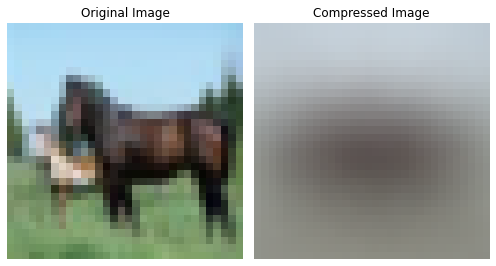

In [34]:
len(np.unique(X_compressed, axis=0)) #should be 32
# Plot the original and the compressed image.
fig, ax = plt.subplots(1, 2, figsize = (7, 7))
ax[0].imshow(x_train[12])
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed[12].reshape((32,32,3)))
ax[1].set_title('Compressed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

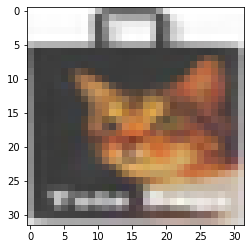

In [ ]:
cat_image = x_train[3000]
plt.imshow(cat_image)

## Question 2 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [38]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')


In [39]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [40]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 2.1 (20 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



In [44]:
# metdadata 0 merges all text data --> genre, tags
# Merge
merged = pd.merge(movies, tags, on='movieId', how='left')
# Create a new DataFrame merged_df with a new metadata column from tags and genres.
merged.fillna("", inplace=True)
merged = pd.DataFrame(merged.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
merged_df = pd.merge(movies, merged, on='movieId', how='left')
merged_df['metadata'] = merged_df[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)
merged_df.head()

#construct the vectorized reprentation of metadata using sklearn's Countvectorizer
#Learn the latent matrix from the metadata vector using truncated SVD with 50 dimensions
#With the generated latent matrix, identify the top 10 most relevant movies for "Toy Story (1995)" by calculating the cosine similairty and finding movies with the highest similarity score


,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,moldy old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,pregnancy remake Comedy


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(merged_df['metadata'])
count_df = pd.DataFrame(count_matrix.toarray(), index=merged_df.index.tolist())

# Apply SVD
svd = TruncatedSVD(n_components=50)
latent_df = svd.fit_transform(count_df)
# change latent to df
# keep the first 50 number of latent components.
n = 50 
latent_df = pd.DataFrame(latent_df[:,0:n], index=merged_df.title.tolist())
latent_df.shape

(9724, 50)

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors for "Toy Story" from content and collaborative matrices
v1 = np.array(latent_df.loc['Toy Story (1995)']).reshape(1, -1)
# Compute the cosine similartity of this movie with the others in the list
sim1 = cosine_similarity(latent_df, v1).reshape(-1)
recommendation_df = pd.DataFrame(sim1, index = latent_df.index, columns=['content'])
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(11)

,content
Toy Story (1995),1.000000
"Wild, The (2006)",0.991241
"Emperor's New Groove, The (2000)",0.991241
"Monsters, Inc. (2001)",0.991241
Antz (1998),0.991241
"Tale of Despereaux, The (2008)",0.991241
"Adventures of Rocky and Bullwinkle, The (2000)",0.991241
Asterix and the Vikings (Astérix et les Vikings) (2006),0.991241
The Good Dinosaur (2015),0.991241
Moana (2016),0.991241


### Question 2.2 (15 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


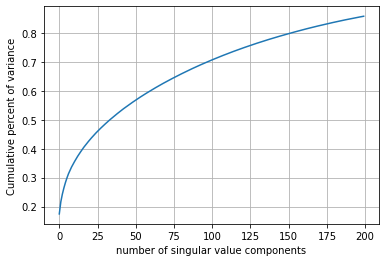

In [65]:
# Merge
ratings1 = pd.merge(movies[['movieId']], ratings, on="movieId", how="right")
# Pivot
ratings2 = ratings1.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
display(ratings2.head())
ratings2.shape
svd = TruncatedSVD(n_components=200)
latent_df_2 = svd.fit_transform(ratings2)
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [67]:
latent_df_2 = pd.DataFrame(latent_df_2, index=merged_df.title.tolist())
print(latent_df_2.shape)
latent_df_2.head()
v2 = np.array(latent_df_2.loc['Toy Story (1995)']).reshape(1, -1)
sim2 = cosine_similarity(latent_df_2, v2).reshape(-1)
#--------------------------------------------------
dictDf = {'content': sim1 , 'collaborative': sim2} 
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)
recommendation_df.sort_values('collaborative', ascending=False, inplace=True)
recommendation_df.head(11)

(9724, 200)


,content,collaborative
Toy Story (1995),1.000000,1.000000
Toy Story 2 (1999),0.858948,0.640832
Independence Day (a.k.a. ID4) (1996),0.191933,0.622446
Jurassic Park (1993),0.197100,0.617029
Mission: Impossible (1996),0.212392,0.601462
Star Wars: Episode IV - A New Hope (1977),0.091535,0.593869
Star Wars: Episode VI - Return of the Jedi (1983),0.185970,0.584002
"Lion King, The (1994)",0.345215,0.583242
Shrek (2001),0.904117,0.582705
Forrest Gump (1994),0.213021,0.577887


### Question 2.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [68]:
hybrid = ((sim1 + sim2)/2.0)
dictDf = {'content': sim1 , 'collaborative': sim2, 'hybrid': hybrid} 
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)
recommendation_df.sort_values('hybrid', ascending=False, inplace=True)
recommendation_df.head(10)

,content,collaborative,hybrid
Toy Story (1995),1.000000,1.000000,1.000000
"Monsters, Inc. (2001)",0.991241,0.551100,0.771170
Toy Story 2 (1999),0.858948,0.640832,0.749890
Shrek (2001),0.904117,0.582705,0.743411
"Bug's Life, A (1998)",0.894243,0.529551,0.711897
Antz (1998),0.991241,0.398066,0.694653
Toy Story 3 (2010),0.904467,0.475557,0.690012
Finding Nemo (2003),0.846784,0.518801,0.682792
Aladdin (1992),0.768426,0.572689,0.670557
Ice Age (2002),0.887690,0.433121,0.660406
